# Timeseries visualization with plotly and folium

### This notebook is part of my project "Embark on Airbnb", and is intended to exhibit visualization result from using different visualization tools.
### To better express the intent, and be concise.  Data will be loaded from processed  `pickle` files.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from folium.plugins import FastMarkerCluster

import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Part 1 Basic interactive timeseries visualization with plotly

#### Load processed DataFrames from saved pickles.

In [3]:
two_year_review = pd.read_pickle("ts.pkl")

In [4]:
two_year_review

,review_count
date,
2019-07-10,534
2019-07-11,501
2019-07-12,519
2019-07-13,533
2019-07-14,613
...,...
2021-04-06,397
2021-04-07,369
2021-04-08,387


#### Create time variable

In [6]:
# create time variable
ts = two_year_review.review_count

In [7]:
def fit_moving_avg(series, window=5):
    """calculate moving average number of reviews
    """
    return series.rolling(window, center=True).mean()

#### Fit moving average 

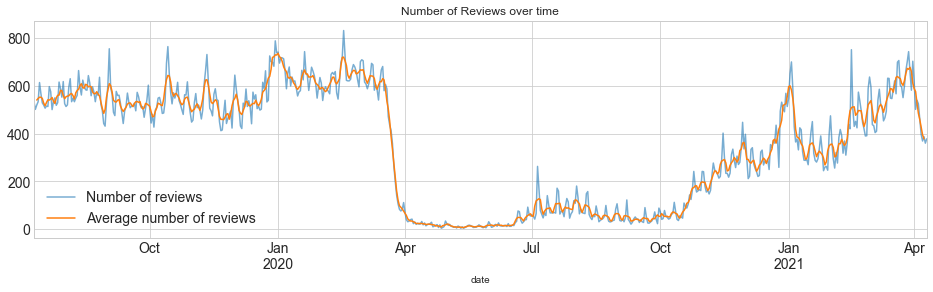

In [8]:
avg_ts = fit_moving_avg(ts)

# plot time variable
ts.plot(figsize=(16, 4), label='Number of reviews', title='Number of Reviews over time', fontsize=14, alpha=0.6)
# plot moving average
avg_ts.plot(label='Average number of reviews', fontsize=14)
plt.legend(fontsize=14);

## Insight:

- This analysis takes the number of reviews per day as an indicator of Airbnb business activity.  It dramaticly decreased after outbreak of COVID-19 in March, 2020.

- The number of reviews keeps increasing which indicates the popularity of Airbnb was thriving before the pandemic. Meanwhile there is a clear seasonality pattern before the mid of Feb, 2020.

### Interactive visualization with `Plotly`

`Plotly` library provides us interactive functionality that may help us to examine trend and seasonality when dealing with time series analysis, and hence offers various options to visualize data and could be a great start for understanding and building a complete dashboard.

In [9]:
# set up for plotly
r = go.Scatter(x=ts.index, y=ts.values, 
               line=go.scatter.Line(color='red', width = 1), opacity=0.8, 
               name='Reviews', text=[f'Reviews: {x}' for x in ts.values])

layout = go.Layout(title='Number of Reviews over time', xaxis=dict(title='Date'),
                   yaxis=dict(title='Count'))

fig = go.Figure(data=[r],layout=layout)
iplot(fig)

### Add `rangeselector` functionality

In [11]:
# Create a layout with a rangeselector and rangeslider on the xaxis
layout = go.Layout(height=600, width=900, font=dict(size=18),
                   title='Number of reviews over time(with Range selector)',
                   xaxis=dict(title='Date',
                                        # Range selector with buttons
                                         rangeselector=dict(
                                             # Buttons for selecting time scale
                                             buttons=list([
                                                 # 4 month
                                                 dict(count=4,
                                                      label='4m',
                                                      step='month',
                                                      stepmode='backward'),
                                                 # 1 month
                                                 dict(count=1,
                                                      label='1m',
                                                      step='month',
                                                      stepmode='backward'),
                                                 # 1 week
                                                 dict(count=7,
                                                      label='1w',
                                                      step='day',
                                                      stepmode='todate'),
                                                 # 1 day
                                                 dict(count=1,
                                                      label='1d',
                                                      step='day',
                                                      stepmode='todate'),
                                                 # Entire scale
                                                 dict(step='all')
                                             ])
                                         ),
                                         # Sliding for selecting time window
                                         rangeslider=dict(visible=True),
                                         # Type of xaxis
                                         type='date'),
                   # yaxis is unchanged
                   yaxis=dict(title='Number of reviews')
                   )

# Create the figure and display
fig = go.Figure(data=[r], layout=layout)
iplot(fig)

## Part 2 Reviews over time with timestamped folium heatmap

#### Load processed DataFrames from saved pickles.

In [12]:
timestamped_weight = pd.read_pickle("timestamped_review.pkl")
timestamped_weight

,latitude,longitude,listing_id,review_count
date,,,,
2019-07-31,"[20.72413, 20.89861, 20.95426, 20.95466, 20.95...","[-156.44767, -156.68151, -156.68576000000002, ...","[13528, 13653, 15757, 16914, 24161, 24500, 302...","[1, 2, 1, 2, 1, 3, 2, 1, 1, 4, 3, 1, 2, 3, 1, ..."
2019-08-31,"[20.72413, 20.89861, 20.95426, 20.95466, 20.95...","[-156.44767, -156.68151, -156.68576000000002, ...","[13528, 13653, 15757, 16914, 24161, 24500, 302...","[3, 3, 3, 3, 3, 5, 1, 1, 4, 3, 5, 2, 3, 4, 2, ..."
2019-09-30,"[20.72413, 20.89861, 20.94837, 20.95426, 20.95...","[-156.44767, -156.68151, -156.69075, -156.6857...","[13528, 13653, 13899, 15757, 16914, 24161, 245...","[6, 4, 1, 3, 2, 2, 4, 3, 1, 1, 1, 3, 3, 5, 1, ..."
2019-10-31,"[20.72413, 20.89861, 20.75723, 20.95426, 20.95...","[-156.44767, -156.68151, -156.45703999999998, ...","[13528, 13653, 13799, 15757, 16914, 24161, 245...","[4, 3, 4, 4, 3, 1, 5, 1, 1, 1, 3, 4, 4, 5, 1, ..."
2019-11-30,"[20.72413, 20.89861, 20.75723, 20.95426, 20.95...","[-156.44767, -156.68151, -156.45703999999998, ...","[13528, 13653, 13799, 15757, 16914, 24161, 245...","[3, 2, 2, 3, 1, 5, 3, 2, 1, 3, 2, 3, 1, 1, 3, ..."
2019-12-31,"[20.72413, 20.89861, 20.75723, 20.95426, 20.95...","[-156.44767, -156.68151, -156.45703999999998, ...","[13528, 13653, 13799, 15757, 24161, 24500, 302...","[3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 1, 3, 5, 1, ..."
2020-01-31,"[20.72413, 20.89861, 20.75723, 20.95426, 20.95...","[-156.44767, -156.68151, -156.45703999999998, ...","[13528, 13653, 13799, 15757, 24161, 24500, 302...","[2, 1, 1, 3, 1, 2, 1, 2, 3, 1, 5, 1, 1, 1, 3, ..."
2020-02-29,"[20.72413, 20.89861, 20.75723, 20.95426, 20.95...","[-156.44767, -156.68151, -156.45703999999998, ...","[13528, 13653, 13799, 15757, 24161, 30236, 302...","[2, 3, 2, 2, 2, 1, 1, 4, 3, 1, 3, 1, 6, 2, 3, ..."
2020-03-31,"[20.72413, 20.89861, 20.75723, 20.95426, 20.95...","[-156.44767, -156.68151, -156.45703999999998, ...","[13528, 13653, 13799, 15757, 24161, 24500, 302...","[2, 1, 2, 3, 3, 3, 2, 1, 2, 2, 3, 1, 1, 2, 4, ..."


In [14]:
# function to transform data to object for folium
def generate_draw_points(df):
    """
    Generate a list of list of points to draw timestamped heatmap for folium
    Each single point is in a form of [latitude, longitude, weight]
    """
    to_draw = []
    for i in range(df.shape[0]):
        single_draw = []
        for j in list(zip(df.iloc[i].latitude, df.iloc[i].longitude, df.iloc[i].review_count)):
            single_draw.append(list(j))
        to_draw.append(single_draw)
        
    time_index = []
    for t in df.index:
        time_index.append(t.strftime("%Y-%m-%d"))
        
    return to_draw, time_index

#### Transform data

In [15]:
# prepare data for folium
points, indice = generate_draw_points(timestamped_weight)[0], generate_draw_points(timestamped_weight)[1]

#### Timestamped heatMap with weights

# To display along timeline, click the display button at the bottom of plot.

In [23]:
# create folium object and add timestamp object
time_map = folium.Map([20.85, -156.5], zoom_start=10.5)
hm = plugins.HeatMapWithTime(points, index=indice, auto_play=True, max_opacity=0.6)
hm.add_to(time_map)

# display map
time_map

## Insight:

- Date is incremented by month, this can be adjusted to a bigger of smaller increment.
- The trend showed from above matches the result acquired by matplotlib.
- Moreover, timestamped visualization can delivere more approachable result to a variaty of audiences.